In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

In [2]:
from cdlib import algorithms

In [3]:
path_subgraph = "../DataSet StackOverflow/Graph_data/"

In [4]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [5]:
path = "../DataSet StackOverflow/"

In [6]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [7]:
community_path = "../DataSet StackOverflow/Community_task/"

In [8]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [9]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [14]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [10]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)

In [15]:
sub_graphs = []
for i in louvain_coms.communities:
    sub_graphs.append(G.subgraph(i))

In [34]:
def network_analysis(G):
    print(nx.info(G))
    N = G.number_of_nodes()
    print("LMAX: ", (N * (N-1))/2.0)
    print("AVG_Degree:", (2*G.number_of_edges())/N)
    density = nx.density(G)
    print("Density: ", density)
    print("Avg Clustering coefficient:", nx.average_clustering(G))

In [24]:
selected_graphs_idx = [0, 1, 3, 12]

In [35]:
for i in selected_graphs_idx:
    network_analysis(sub_graphs[i])

Name: 
Type: Graph
Number of nodes: 2219
Number of edges: 11561
Average degree:  10.4200
LMAX:  2460871.0
AVG_Degree: 10.42000901306895
Density:  0.004697930123114946
Avg Clustering coefficient: 0.745853643868325
Name: 
Type: Graph
Number of nodes: 1850
Number of edges: 9273
Average degree:  10.0249
LMAX:  1710325.0
AVG_Degree: 10.024864864864865
Density:  0.005421776562933946
Avg Clustering coefficient: 0.7515133892823999
Name: 
Type: Graph
Number of nodes: 1514
Number of edges: 5741
Average degree:   7.5839
LMAX:  1145341.0
AVG_Degree: 7.583883751651255
Density:  0.005012480999108562
Avg Clustering coefficient: 0.6510064338315261
Name: 
Type: Graph
Number of nodes: 138
Number of edges: 334
Average degree:   4.8406
LMAX:  9453.0
AVG_Degree: 4.840579710144928
Density:  0.03533269861419655
Avg Clustering coefficient: 0.6782361888485188


# 1 - Centrality Community 0

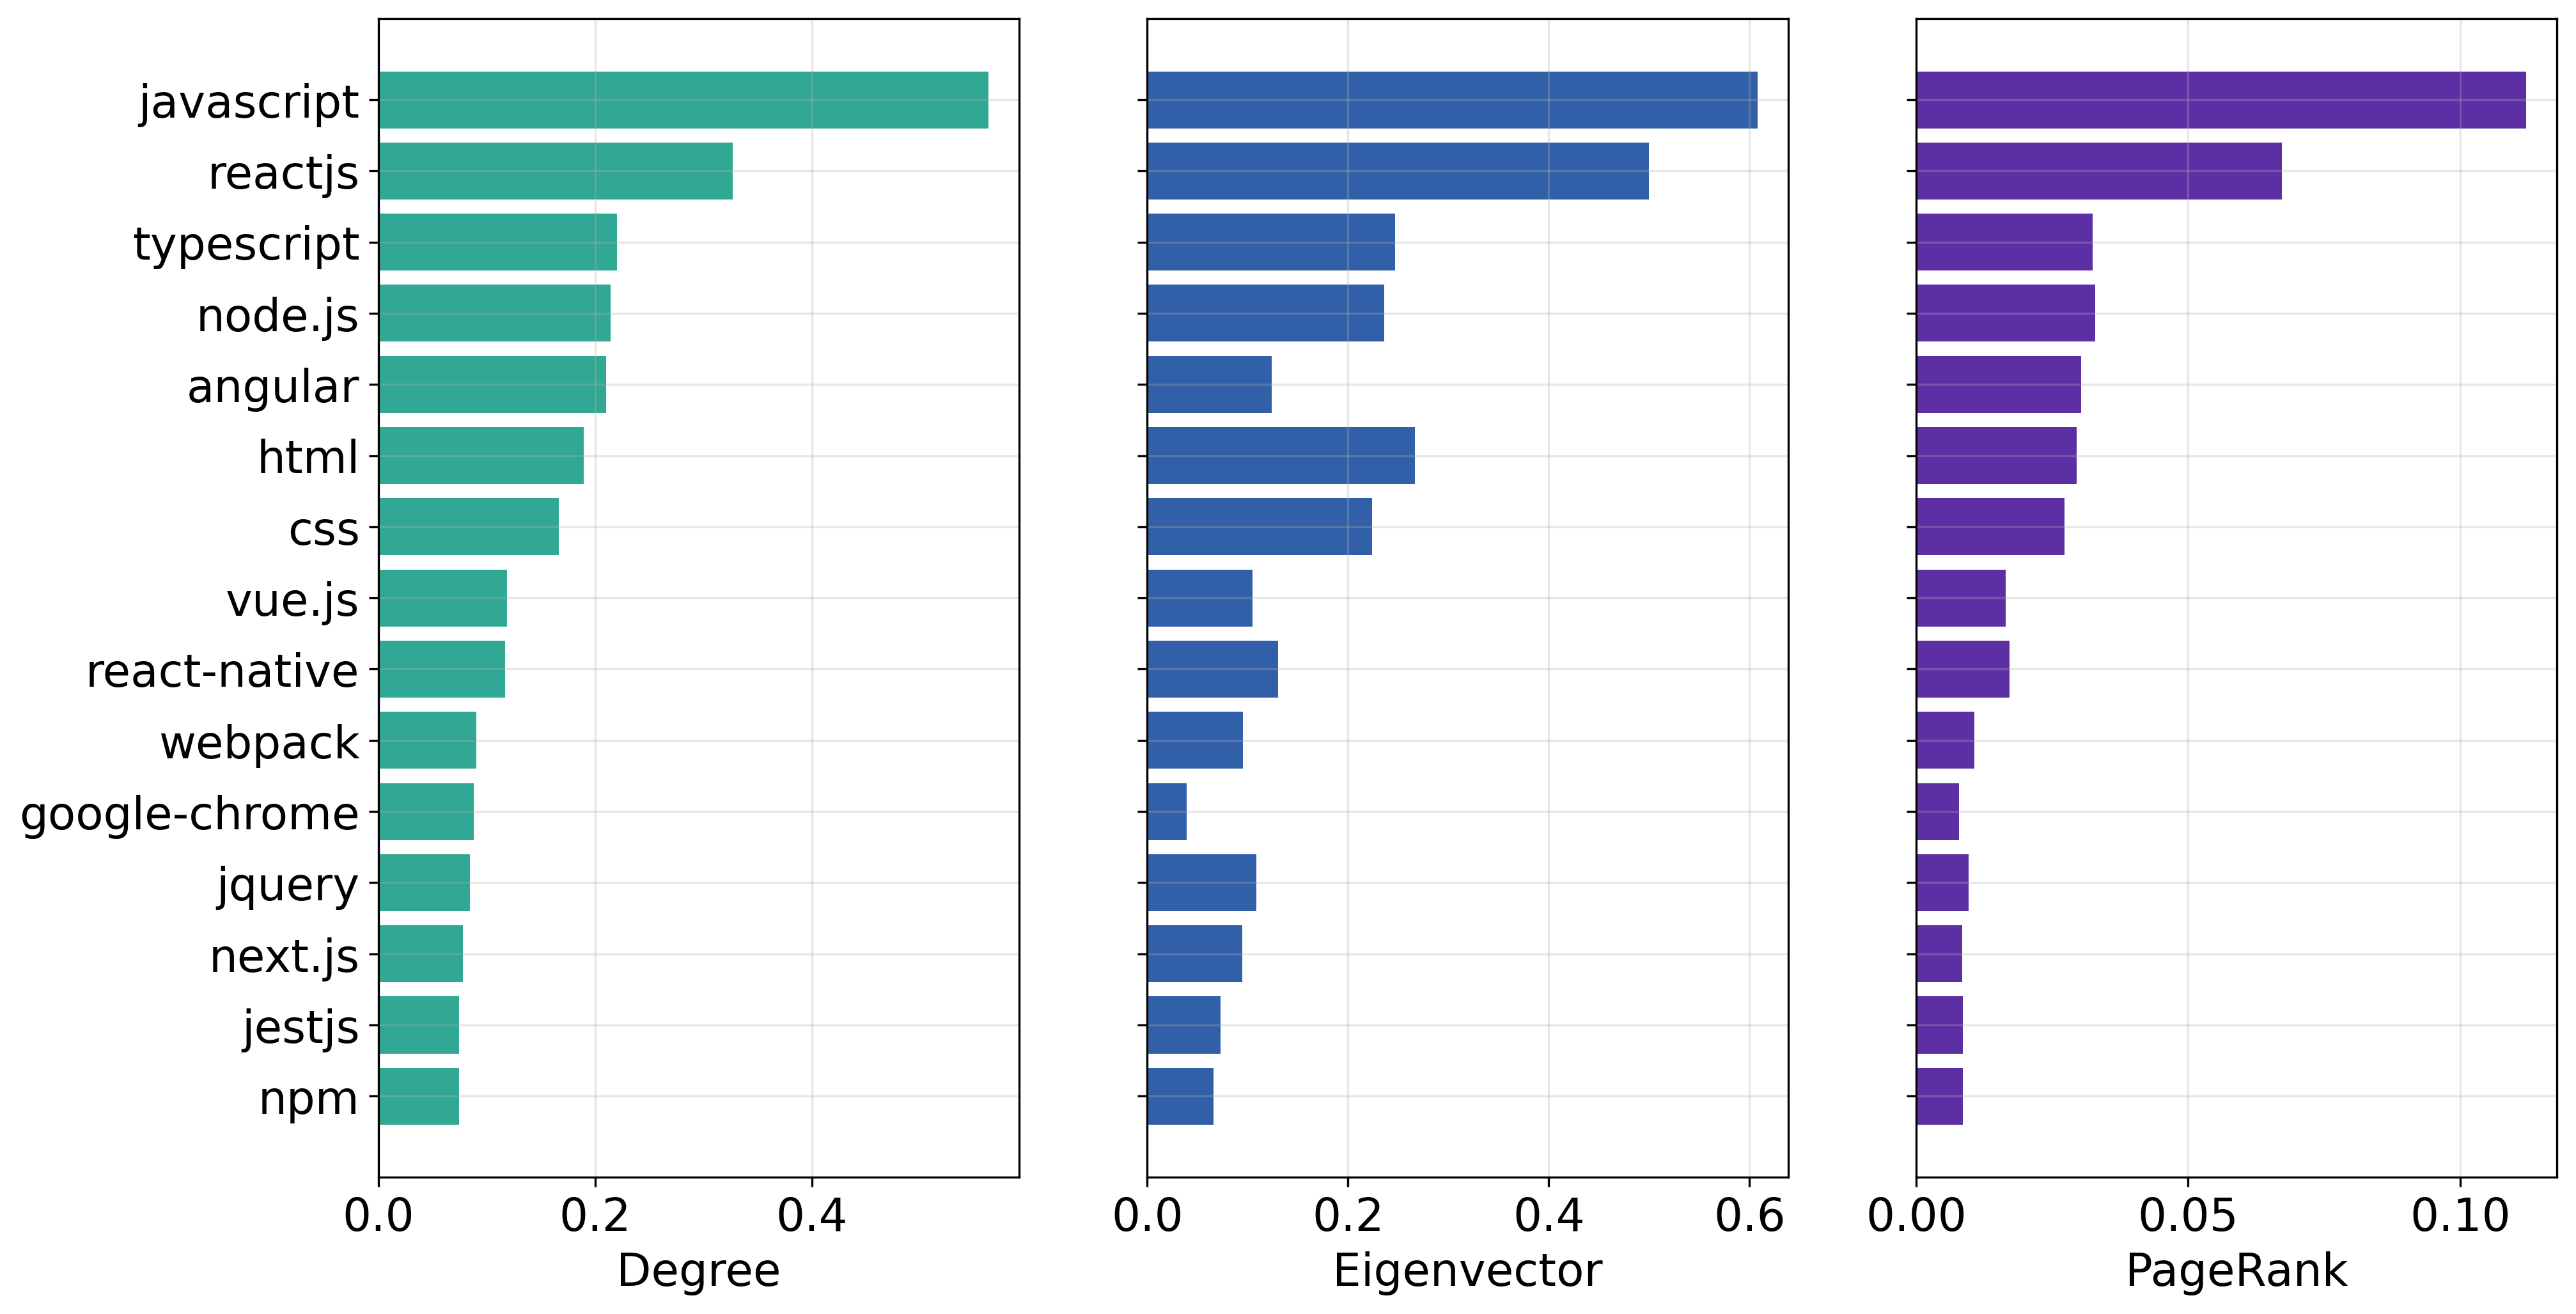

In [26]:
degree_centrality = nx.degree_centrality(sub_graphs[0])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[0], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[0], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

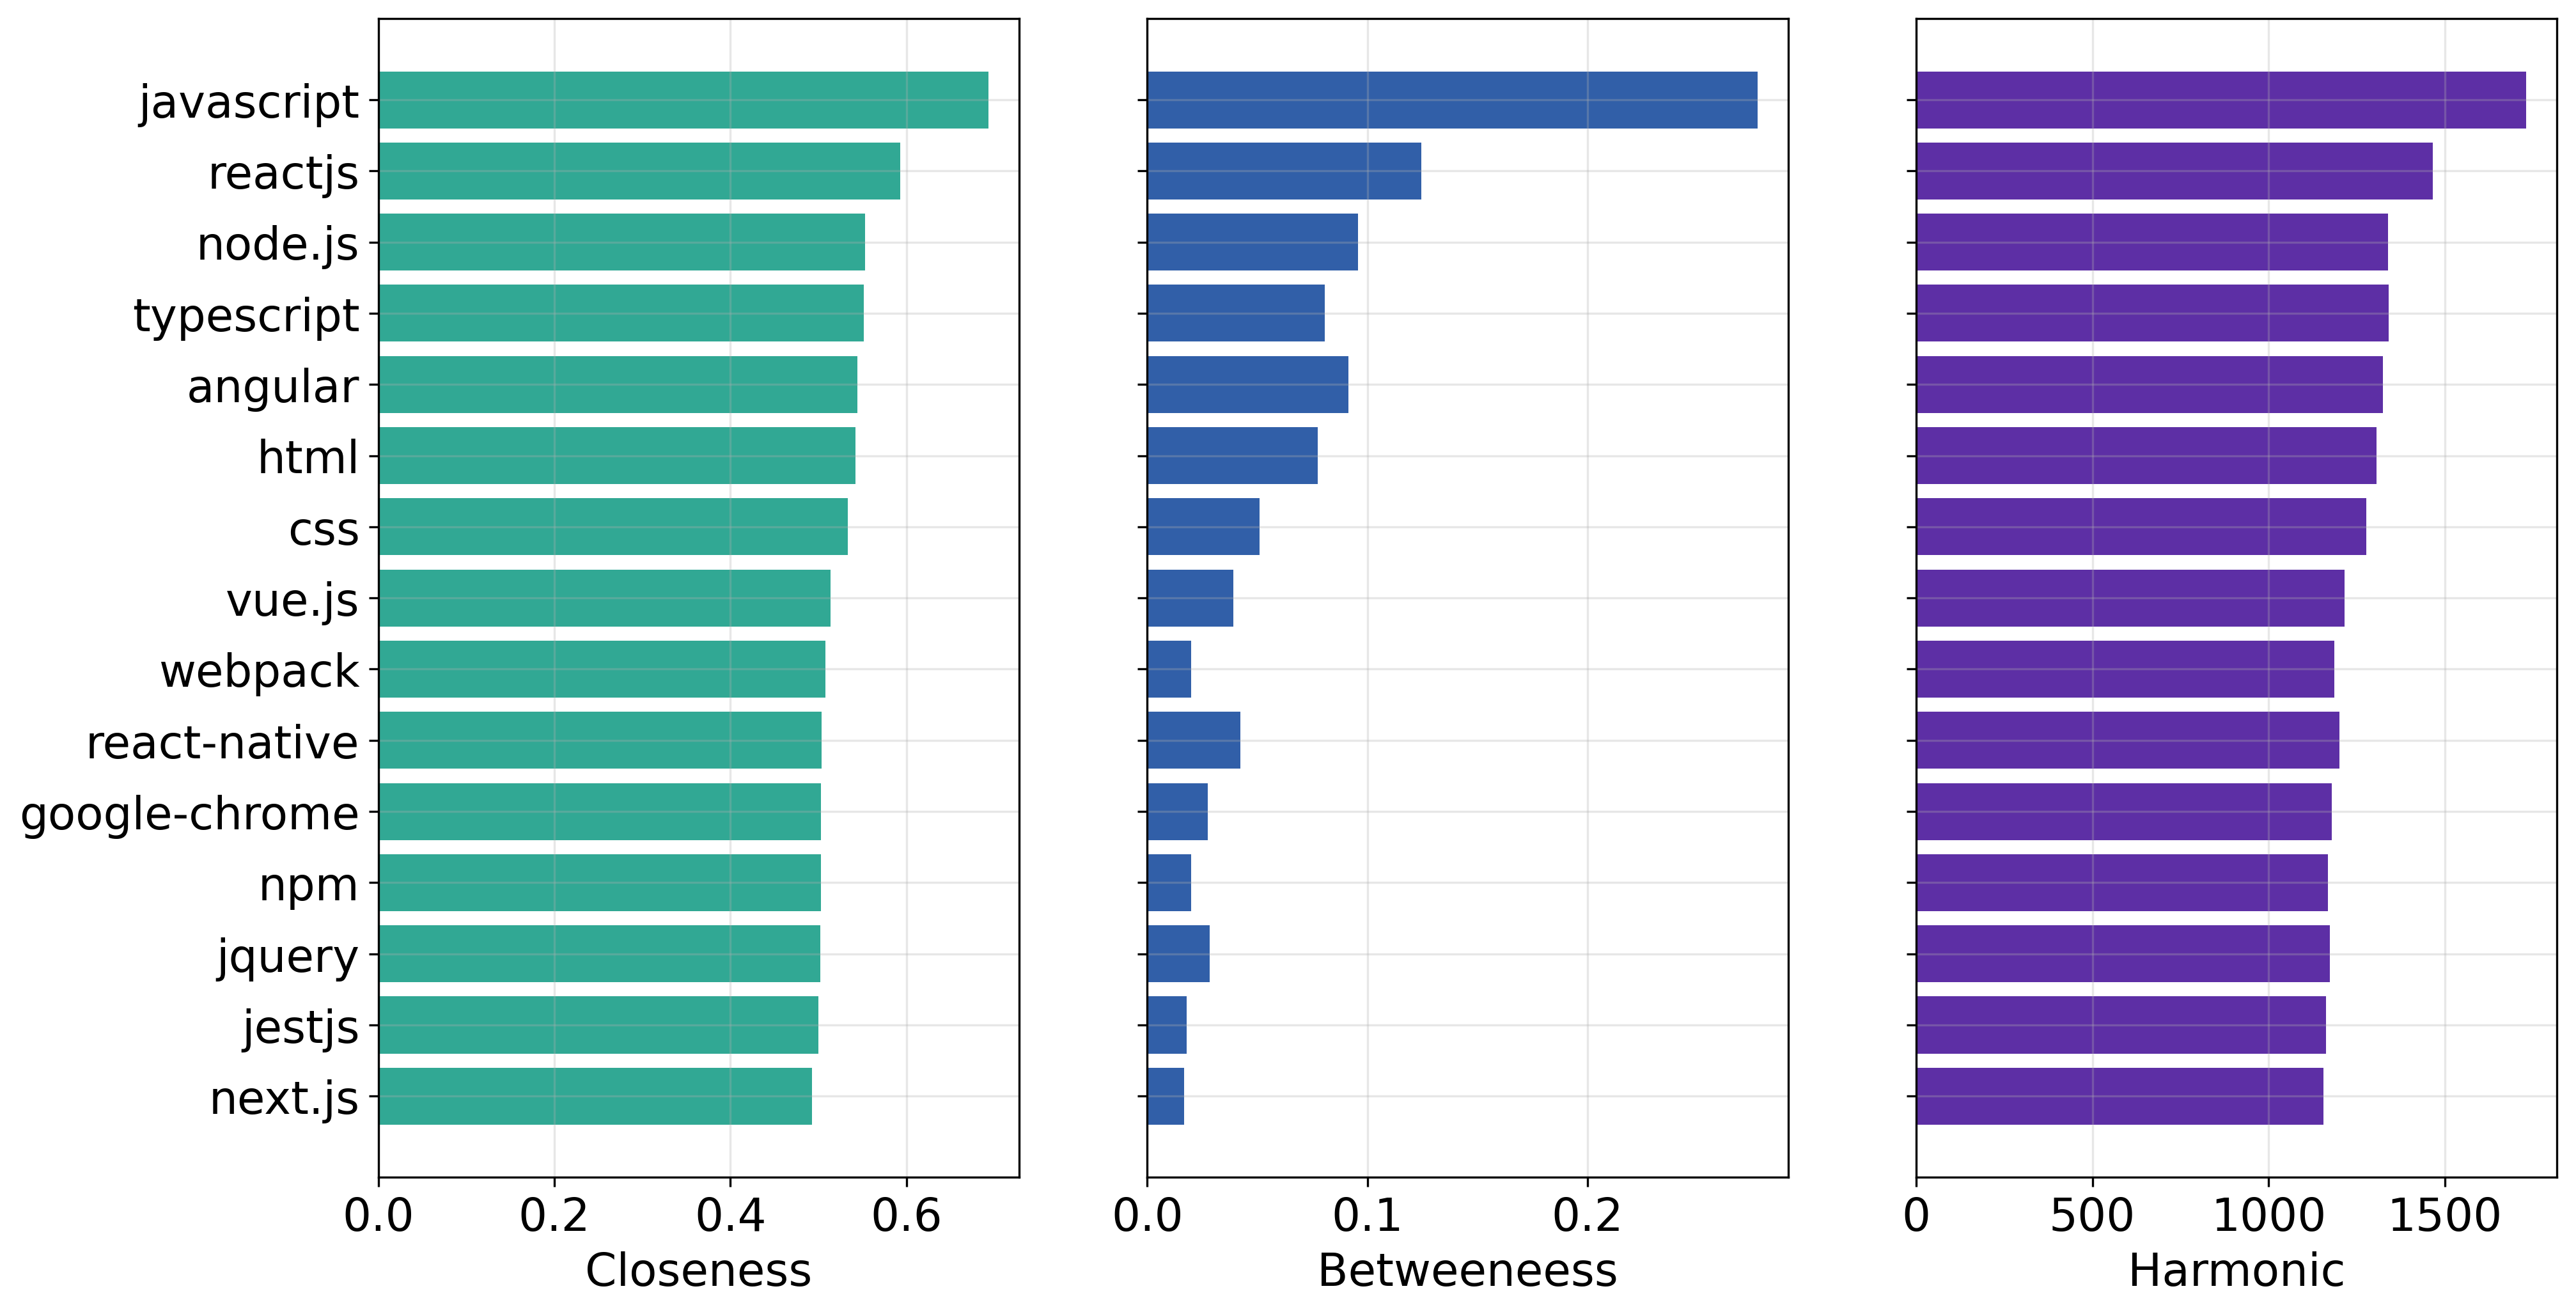

In [30]:
closeness_centrality = nx.closeness_centrality(sub_graphs[0])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[0])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[0], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 2 - Centrality Community 1

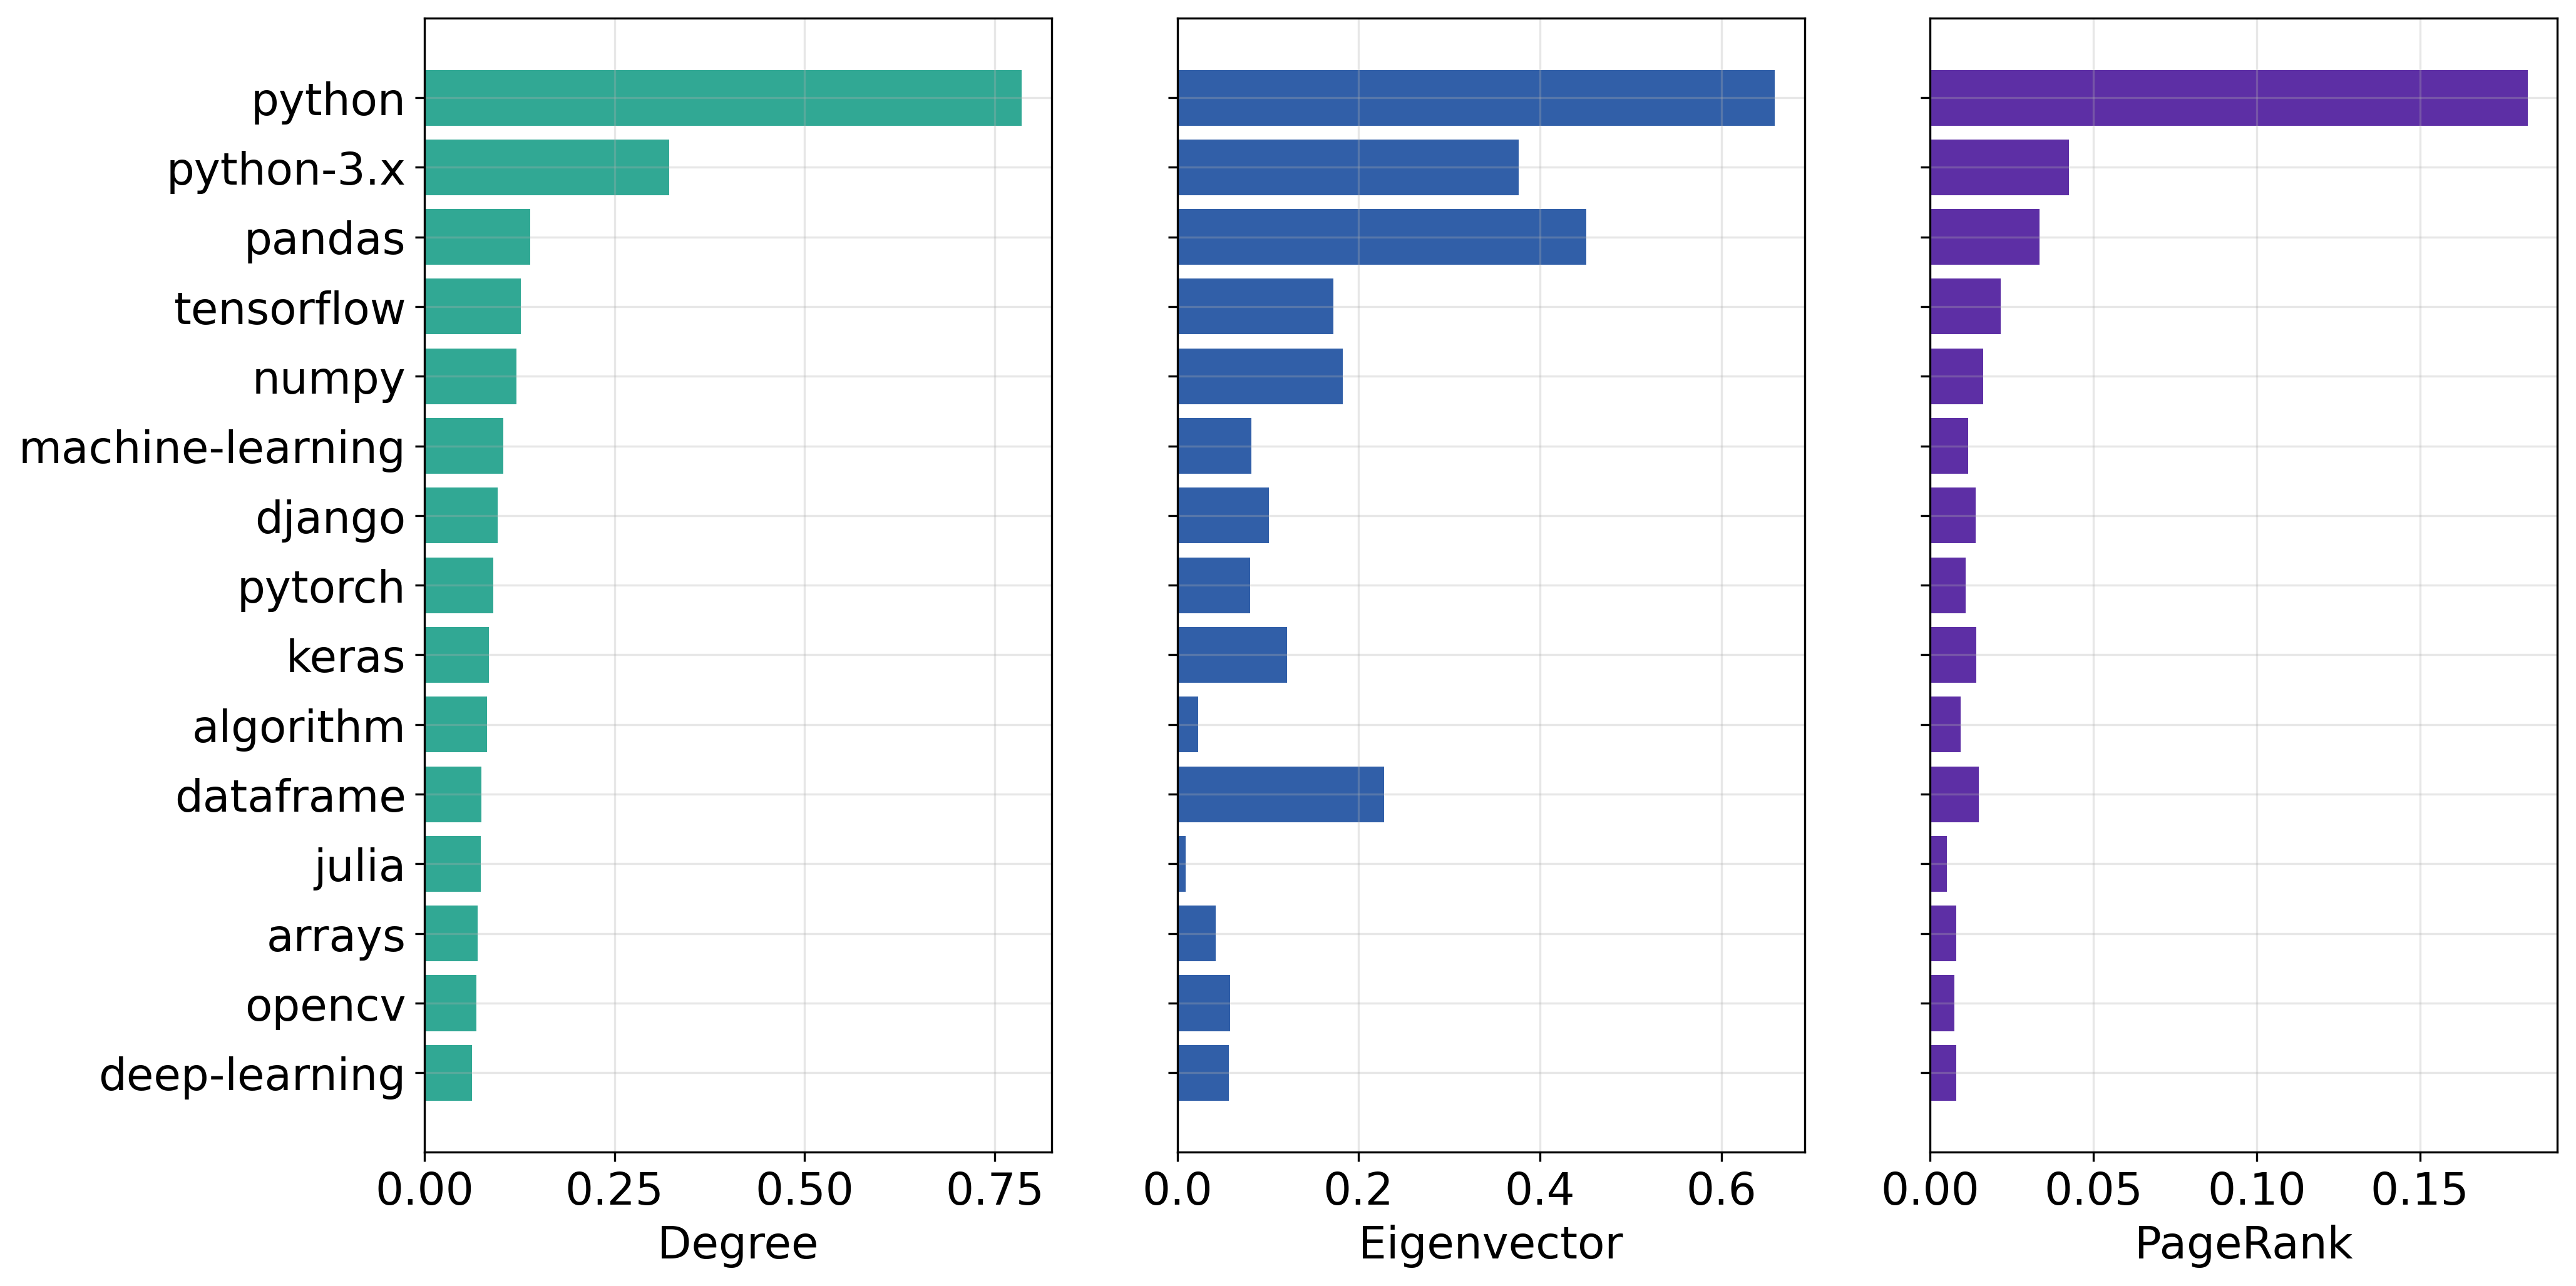

In [27]:
degree_centrality = nx.degree_centrality(sub_graphs[1])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[1], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[1], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

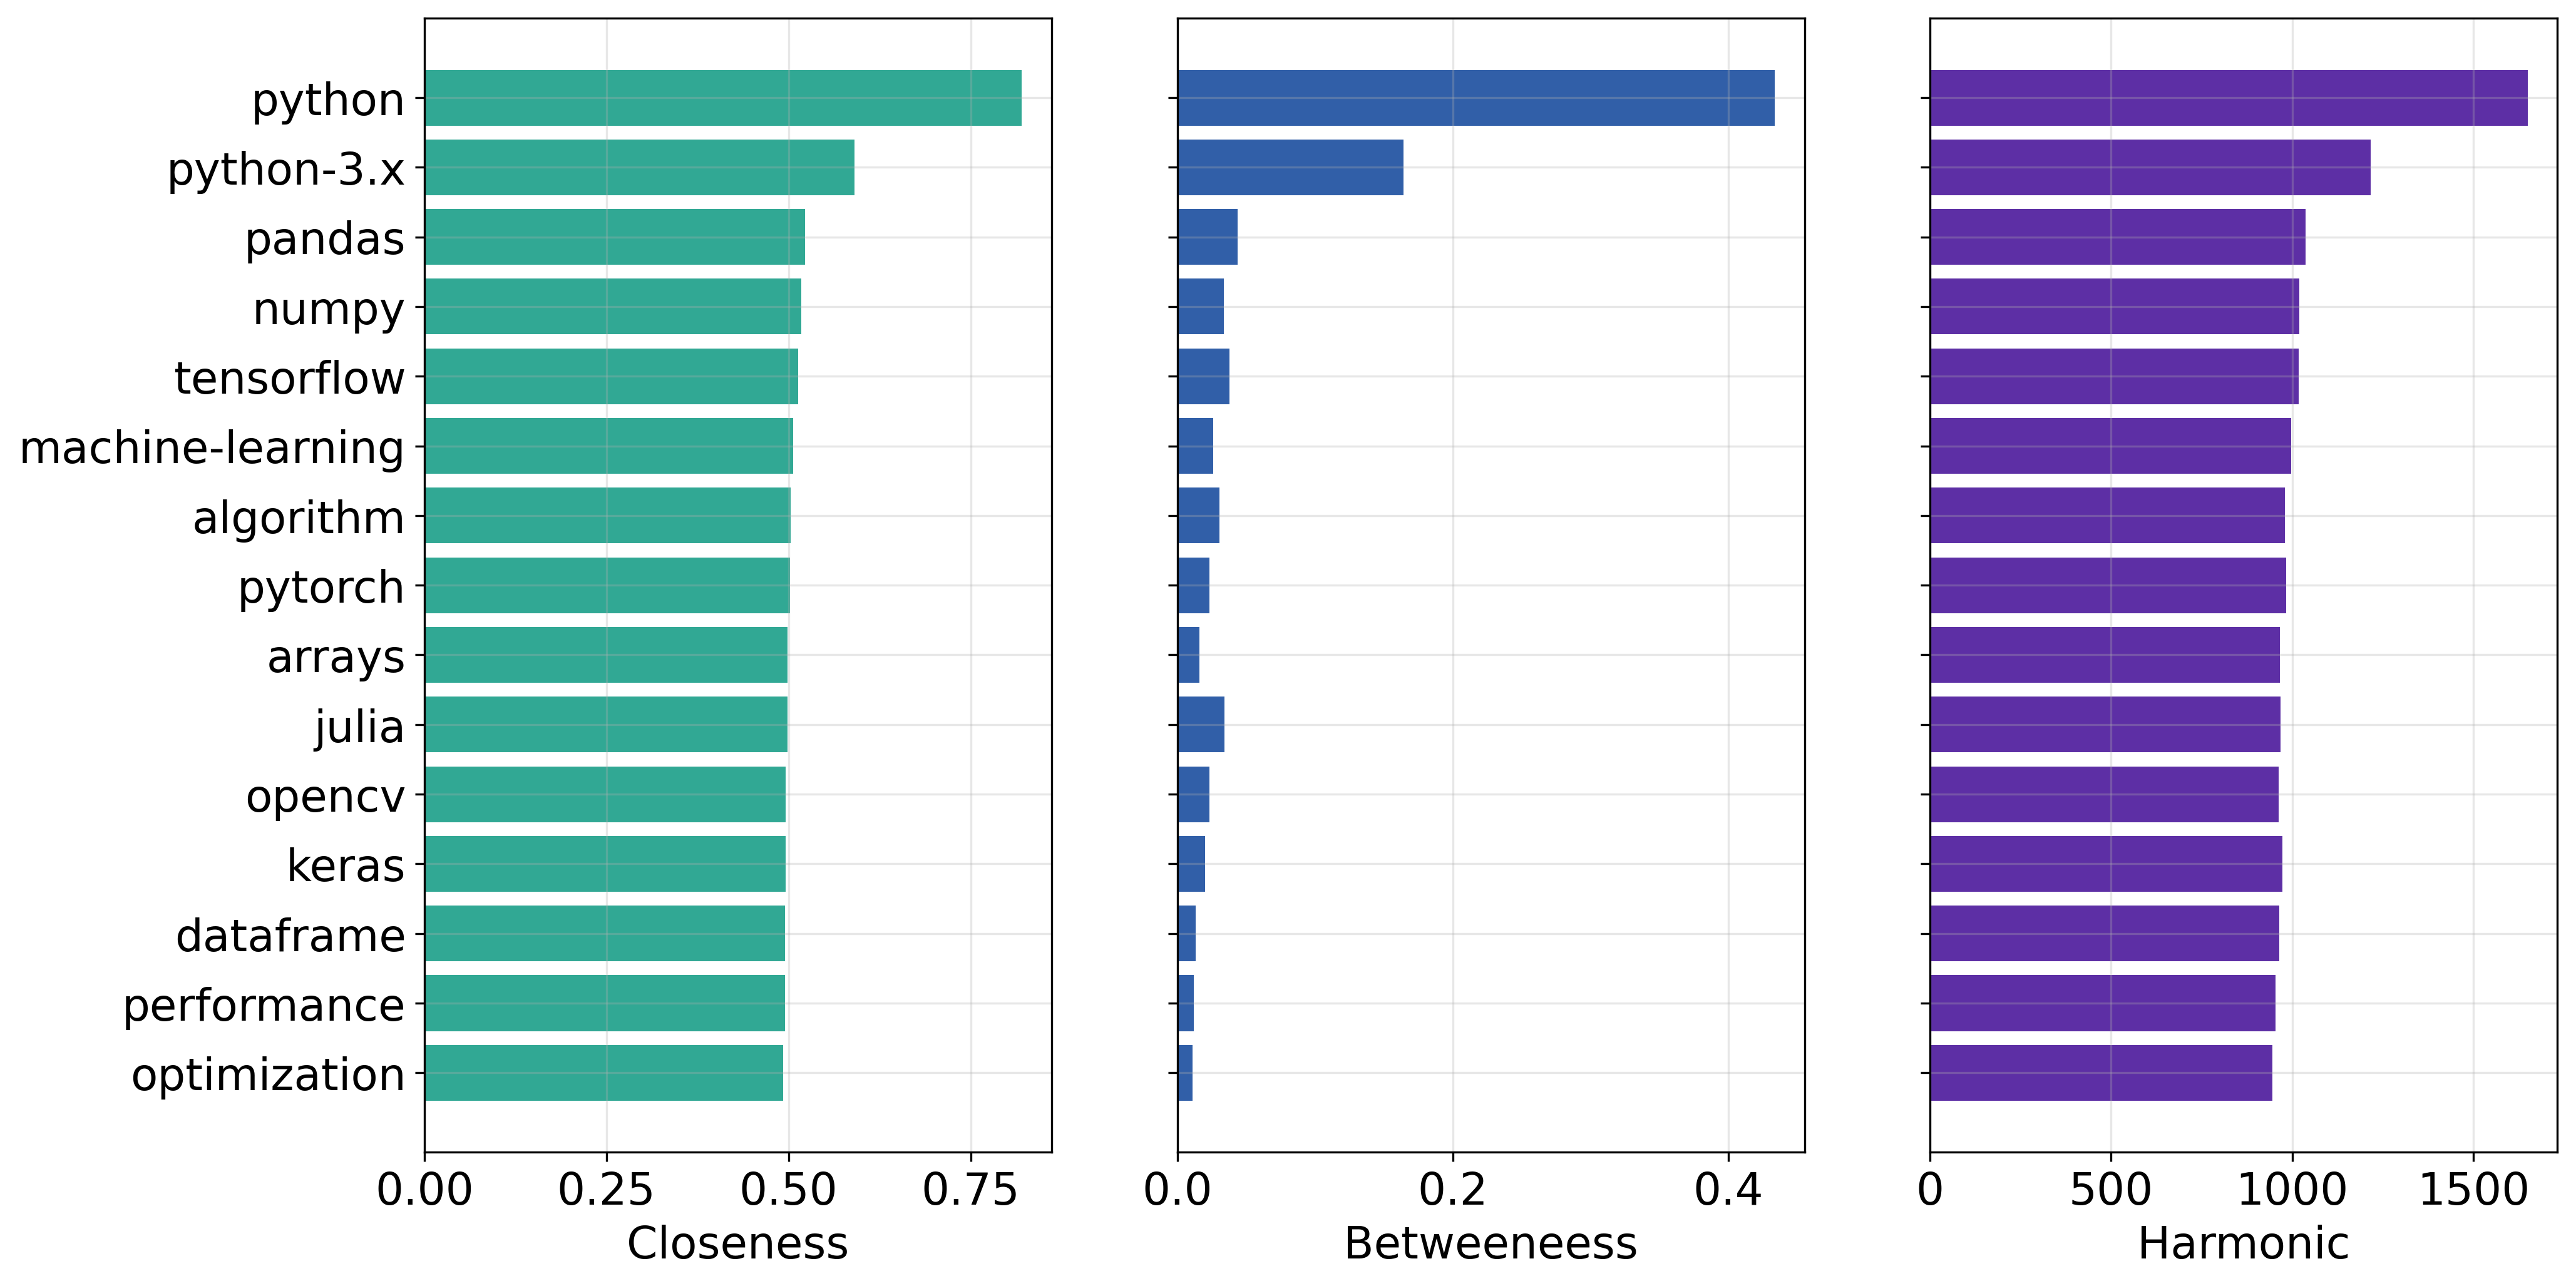

In [31]:
closeness_centrality = nx.closeness_centrality(sub_graphs[1])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[1])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[1], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 3 - Centrality Community 3

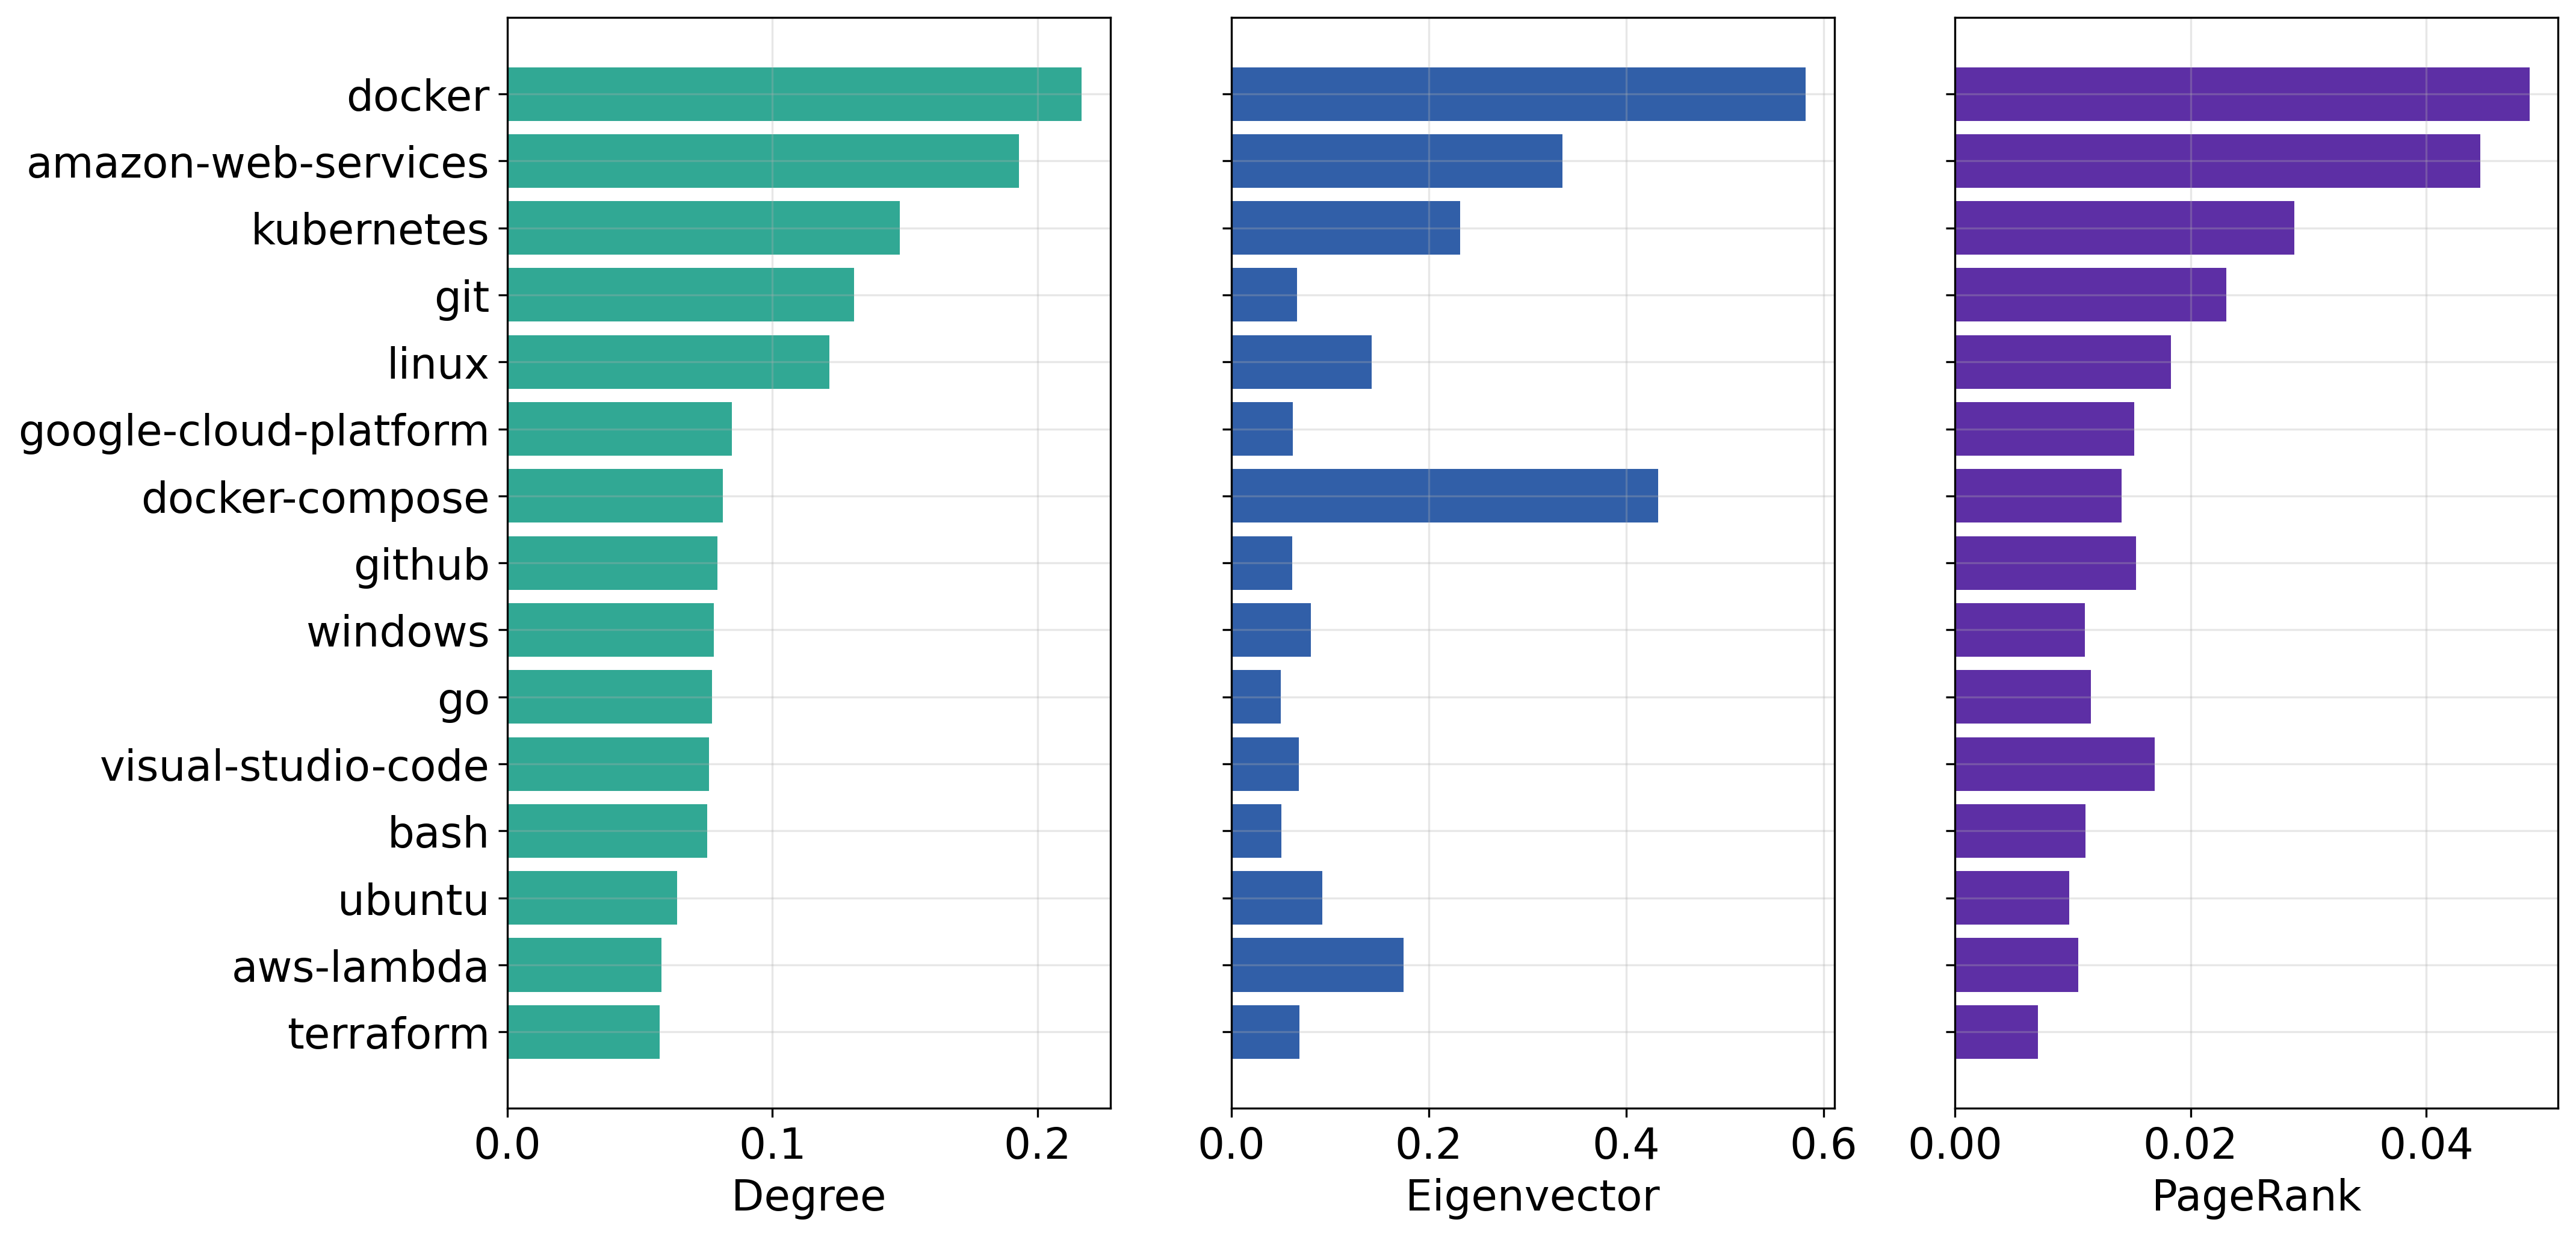

In [28]:
degree_centrality = nx.degree_centrality(sub_graphs[3])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[3], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[3], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

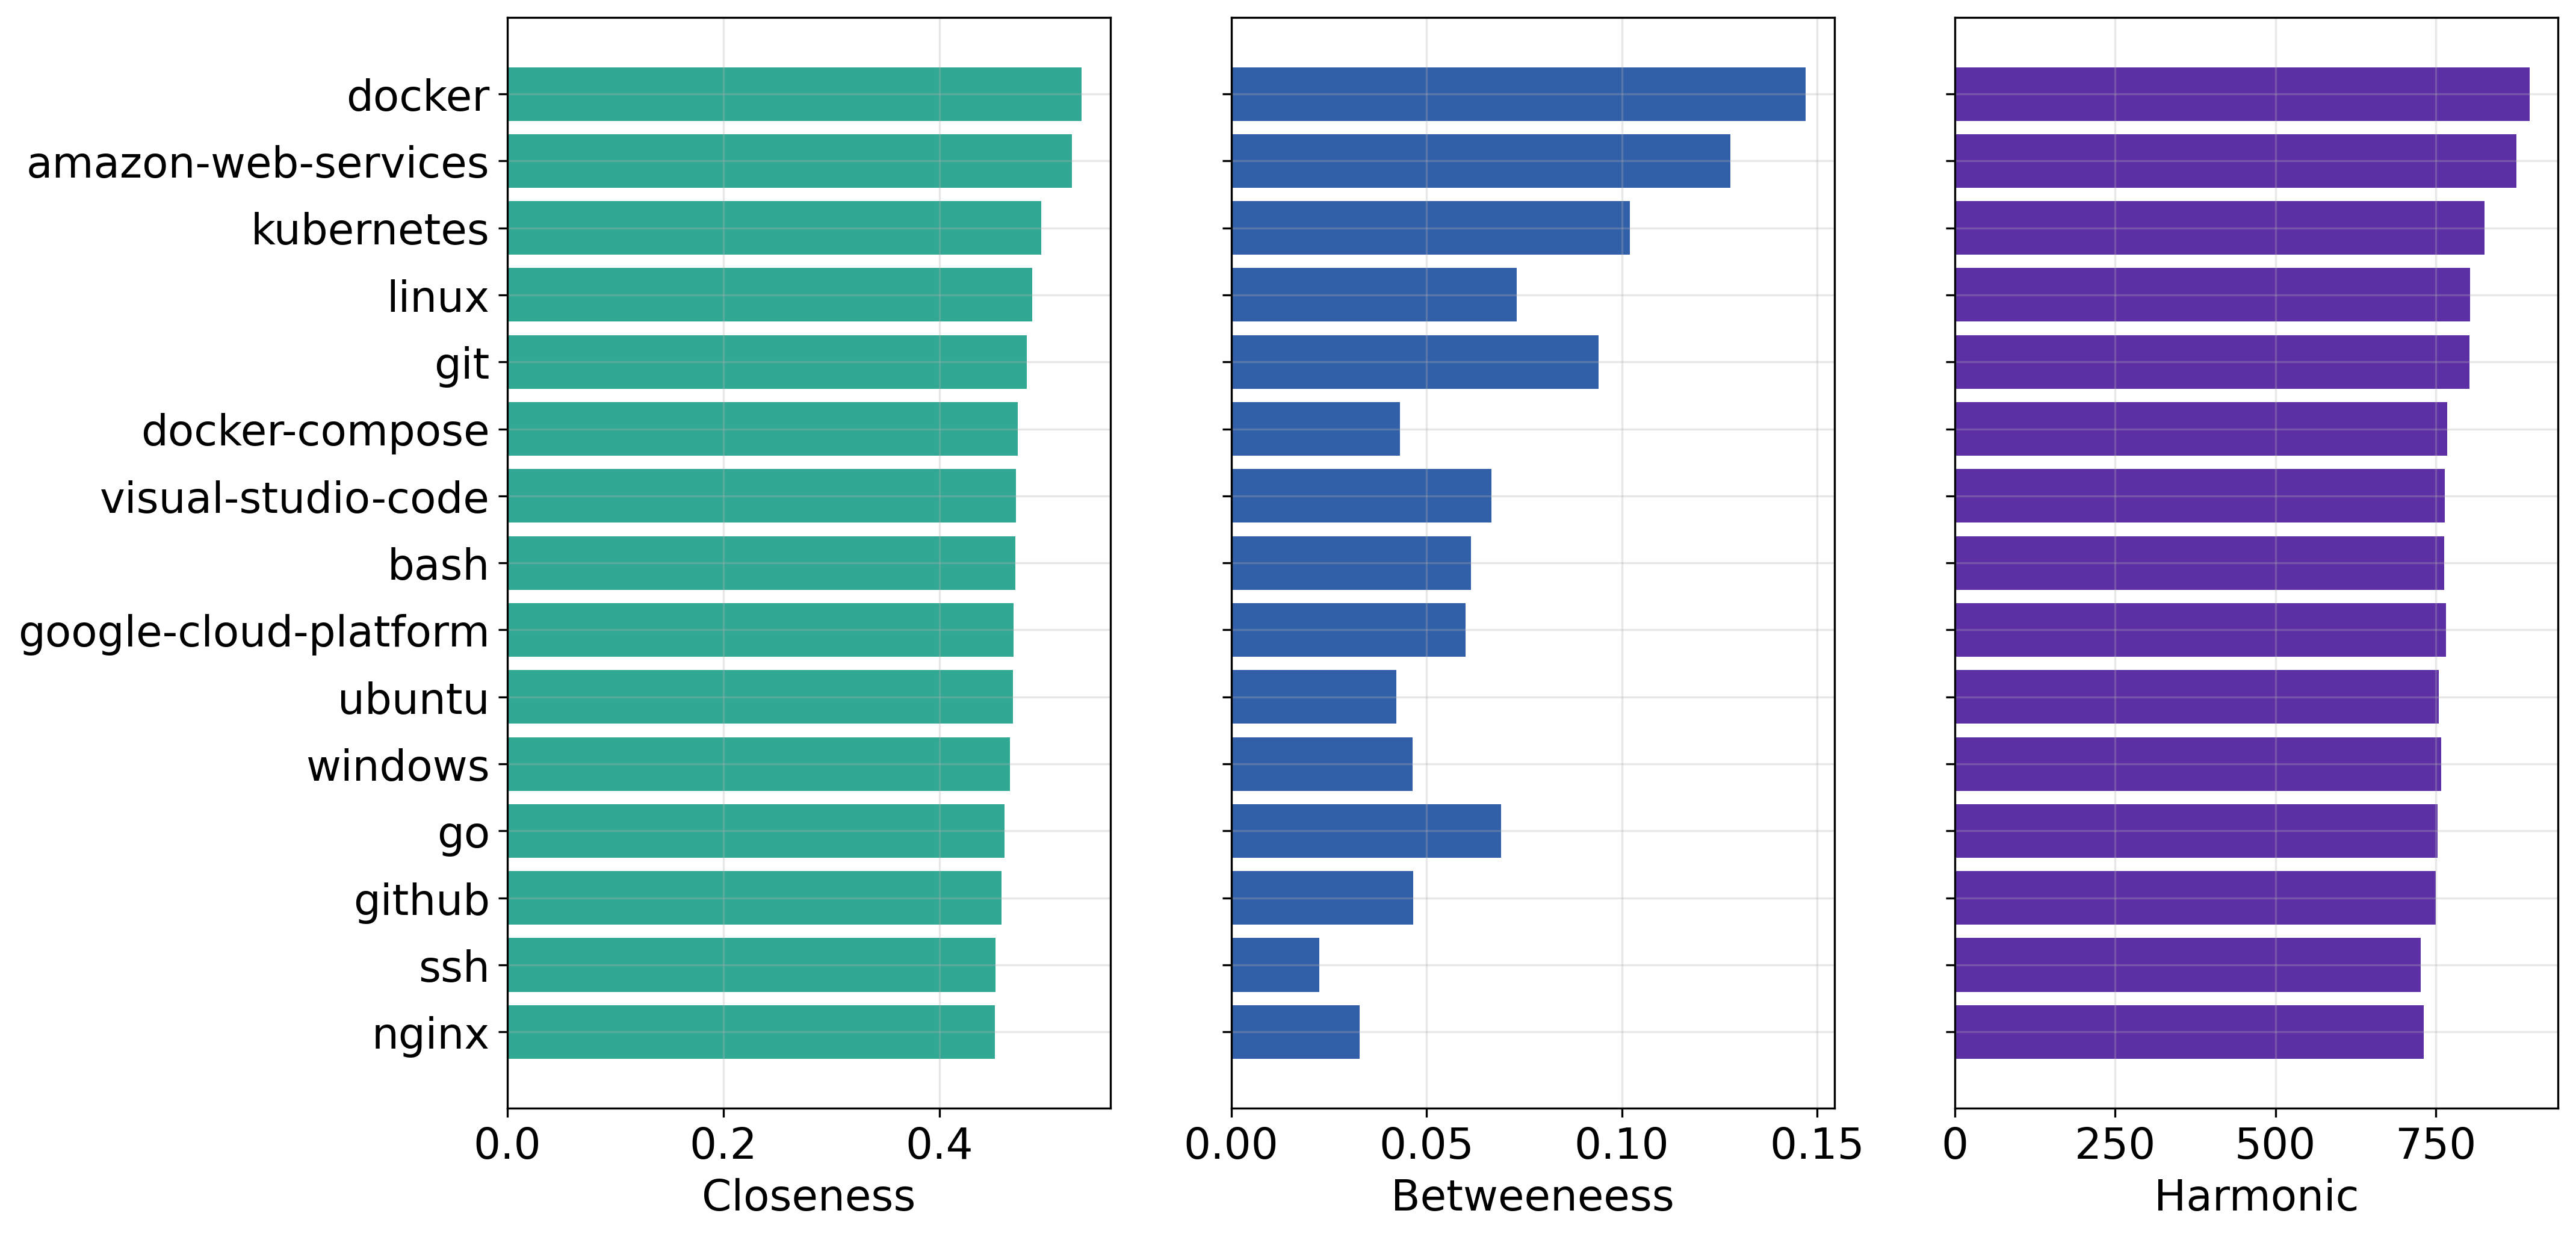

In [32]:
closeness_centrality = nx.closeness_centrality(sub_graphs[3])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[3])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[3], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 4 - Centrality Community 12

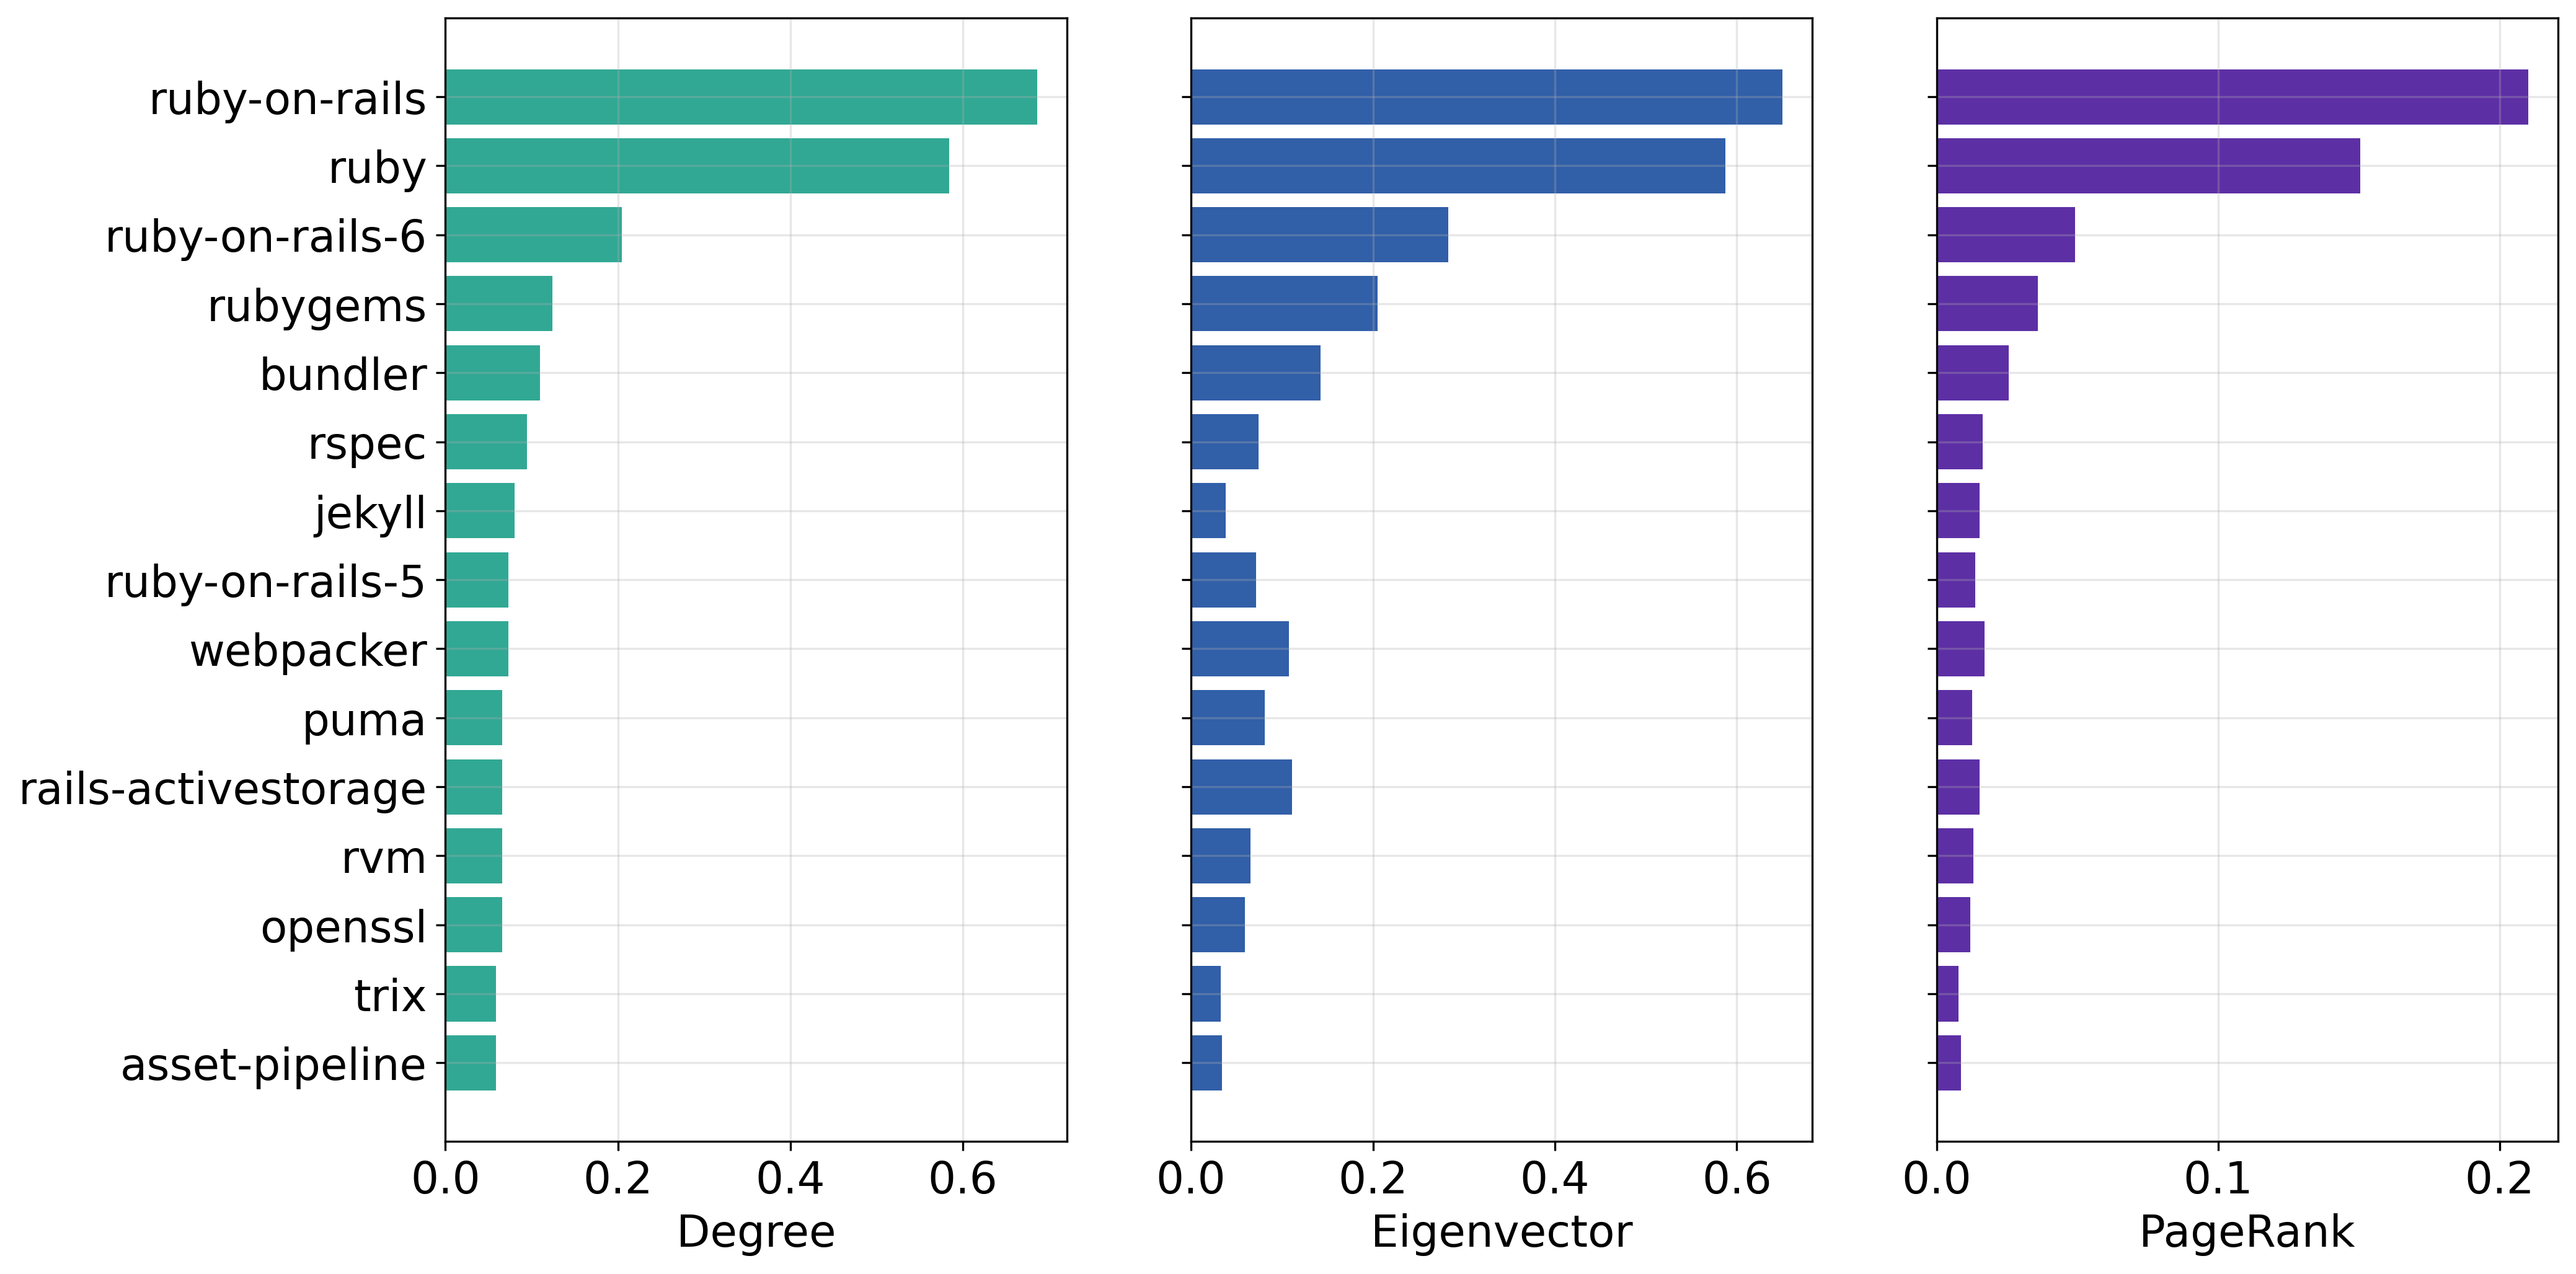

In [29]:
degree_centrality = nx.degree_centrality(sub_graphs[12])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[12], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[12], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

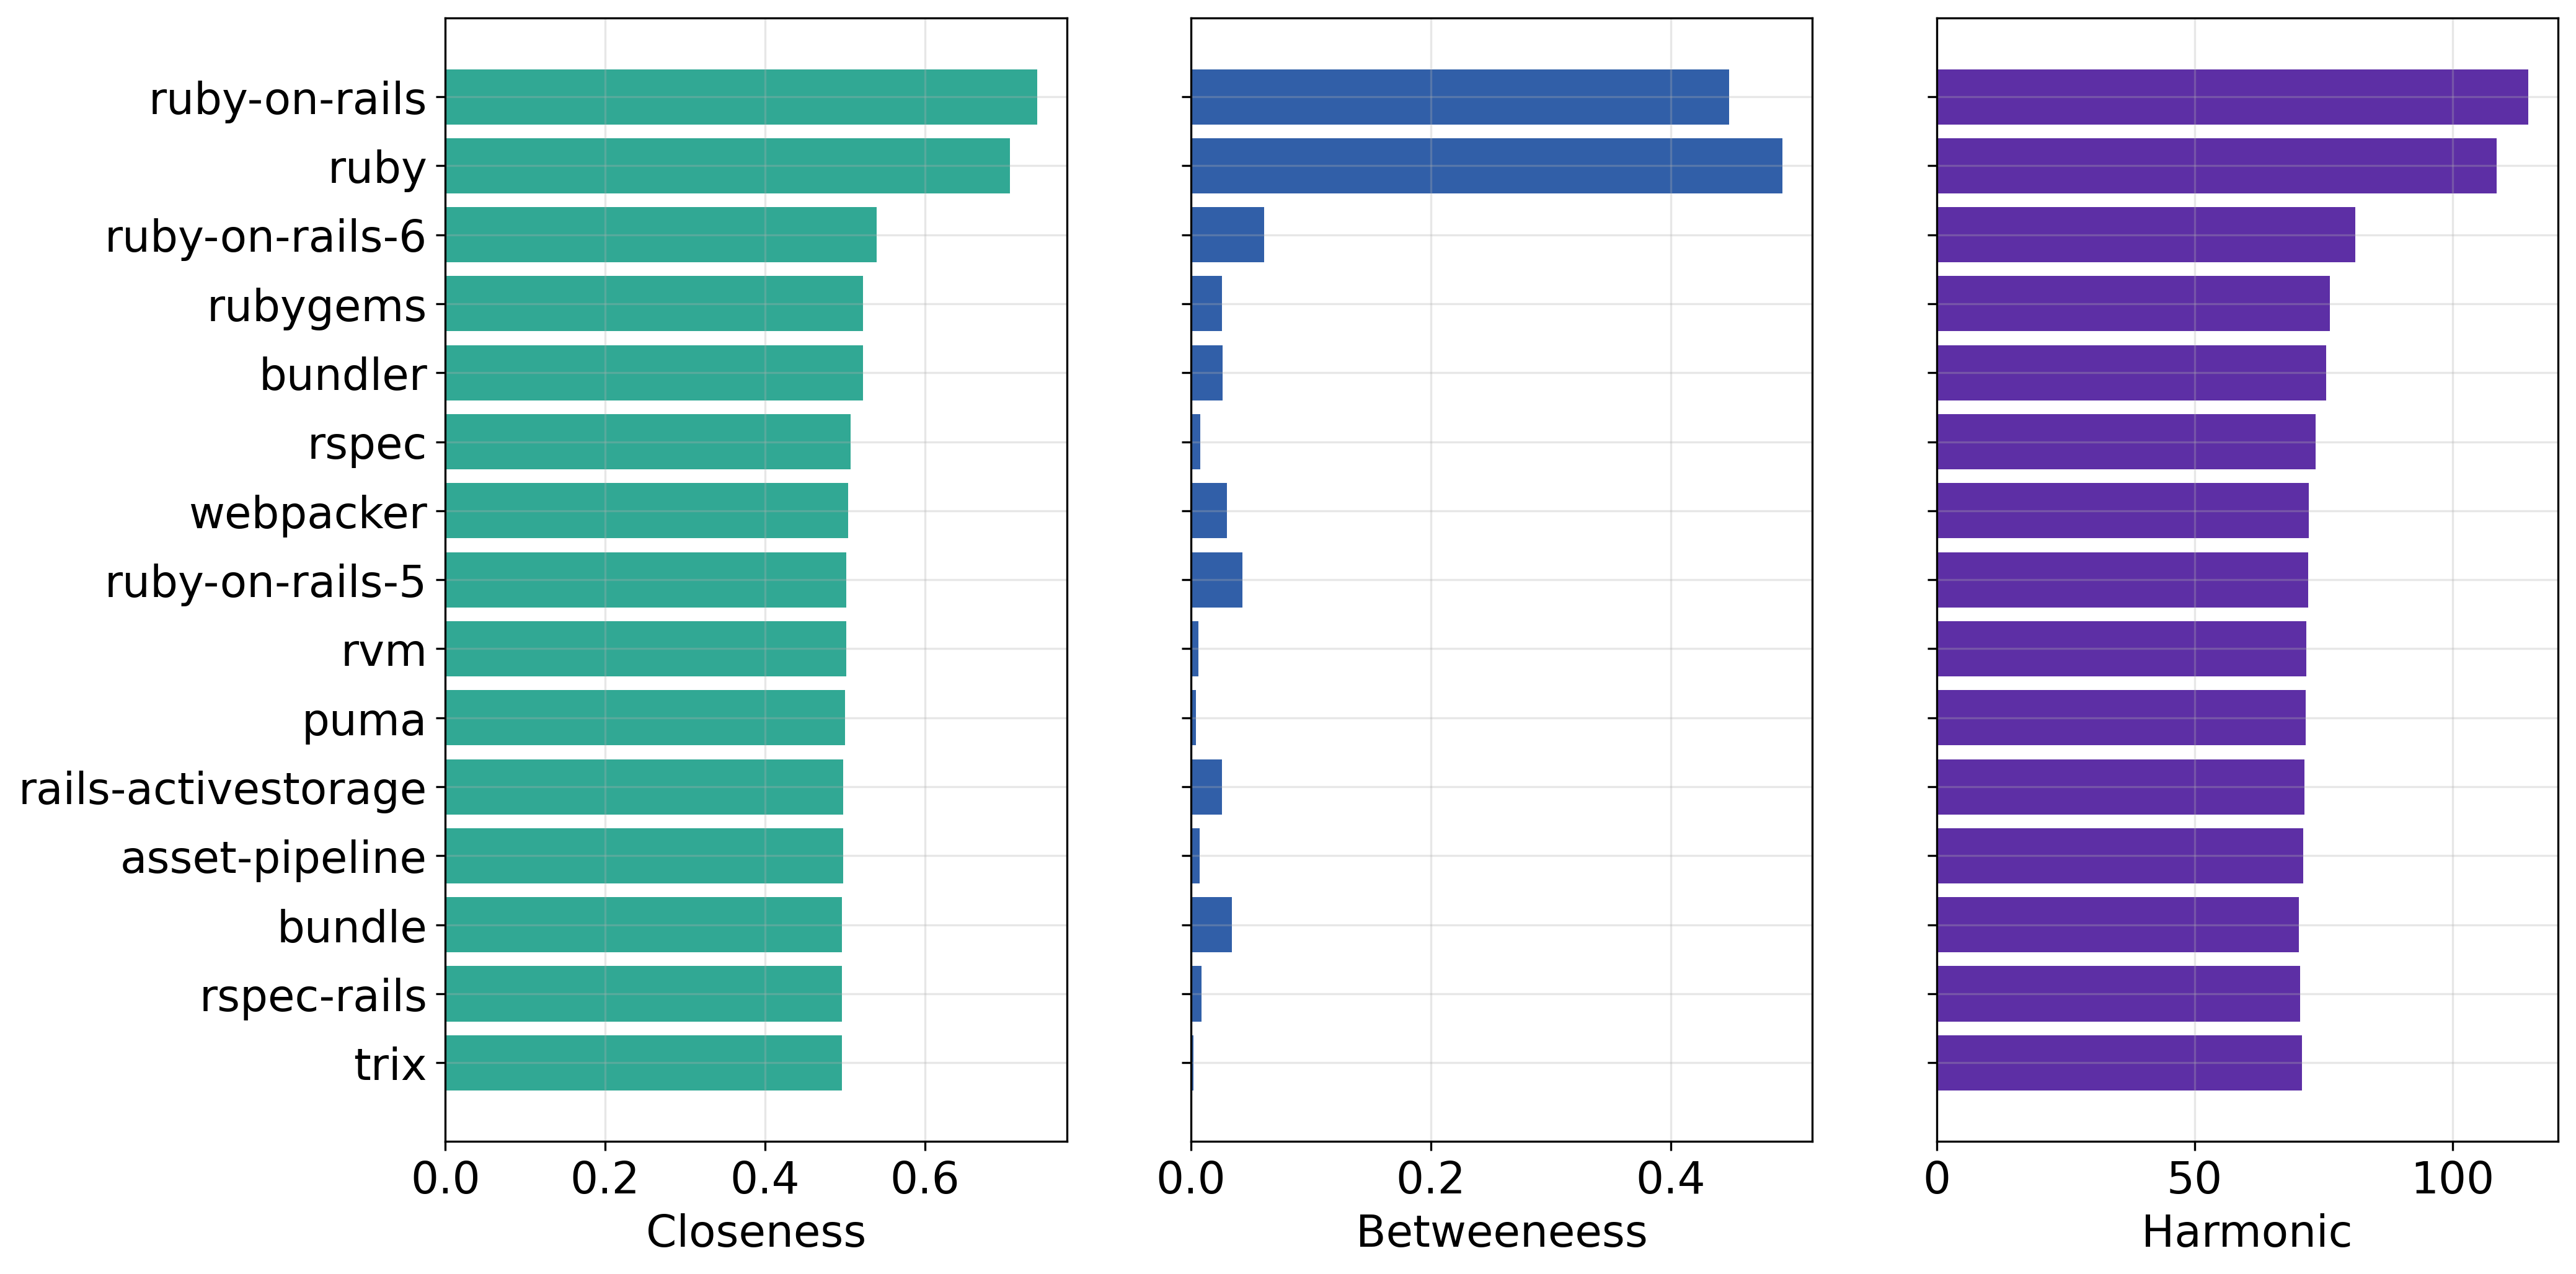

In [33]:
closeness_centrality = nx.closeness_centrality(sub_graphs[12])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[12])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[12], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)